# Controlled Addition

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `CAdd`
An n-bit controlled-addition gate.

#### Parameters
 - `a_dtype`: Quantum datatype used to represent the integer a.
 - `b_dtype`: Quantum datatype used to represent the integer b. Must be large enough to hold the result in the output register of a + b, or else it simply drops the most significant bits. If not specified, b_dtype is set to a_dtype.
 - `cv`: When controlled=0, this bloq is active when the ctrl register is 0. When controlled=1, this bloq is active when the ctrl register is 1. 

#### Registers
 - `ctrl`: the control bit for the addition
 - `a`: A a_dtype.bitsize-sized input register (register a above).
 - `b`: A b_dtype.bitsize-sized input/output register (register b above). 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 


In [2]:
from qualtran.bloqs.arithmetic import CAdd

### Example Instances

In [3]:
cadd_small = CAdd(QUInt(3))

In [4]:
cadd_large = CAdd(QUInt(1000), QUInt(1000))

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([cadd_small, cadd_large],
           ['`cadd_small`', '`cadd_large`'])

### Call Graph

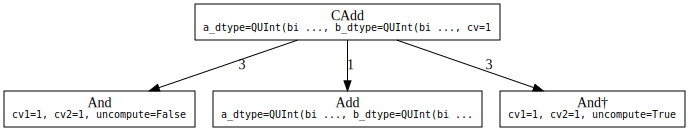

#### Counts totals:
 - `Add`: 1
 - `And`: 3
 - `And†`: 3

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
cadd_small_g, cadd_small_sigma = cadd_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(cadd_small_g)
show_counts_sigma(cadd_small_sigma)